In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# ARIMA models

__ARIMA__ models are used to forecast a time series using the series past values.

__Forescasting a time series can be broadly divided into two types__:
- if we use only the previous values of the time series to predict its future values, it is called __Univariate Time Series Forecasting__;


- if we use predictors other than the series (like exogenous variables) to forecast it is called __Multi Variate Time Series Forecasting__;

__ARIMA__ stands for __Autoregressive Integrated Moving Average__ model. It belongs to a class of models that explains a given time series based on its own past values -i.e.- its own lags and the lagged forecast errors. The equation can be used to forecast future values. Any 'non-seasonal' time series that exhibits patterns and is not a random white noise can be modeled with ARIMA models. 


So, __ARIMA__ is a forecasting algorithm based on the idea that the information in the past values of the time series can alone be used to predict the future values.


__ARIMA Models__ are specified by three order parameters (p, d, q):
- p is the order of the __AR__ term;


- q is the order of the __MA__ term;


- d is the number of differencing required to make the time series stationary;


__AR(p) Autoregression__ - a regression model that utilizes the dependent relationship between a current observation and observations over a previous period. An auto regressive (AR(p)) component refers to the use of past values in the regression equation for the time series.


__I(d) Integration__ - uses differencing of observations (subtracting an observation from an observation at the previous time step) in order to make the time series stationary. Differencing involves the subtraction of the current values of a series with its previous values d number of times.


__MA(q) Moving Average__ - a model that uses the dependency between an observation and a residual error from a moving average model applied to lagged observations. A moving average component depicts the error of the model as a combination of previous error terms. The order q represents the number of terms to be included in the model

## Types of ARIMA models

- __ARIMA__: Non-seasonal Autoregressive Integrated Moving Averages;


- __SARIMA__: Seasonal ARIMA


- __SARIMAX__: Seasonal ARIMA with exogenous variables

If a time series has seasonal patterns then we need to add seasonal terms and it becomes __SARIMA__

## The meaning of p, d and q in ARIMA model

### The meaning of p

__p__ is the order of the __Auto Regressive (AR)__ term. It refers to the number of lags of Y to be used as predictors.

### The meaning of d

- the term __Auto Regressive__ in ARIMA means it is a linear regression model that uses its own lags as predictors. Linear regression models work best when the predictors are not correlated and are independent of each other. So we need to make the time series stationary.


- the most common approach to make the series stationary is to difference it. That is, subtract the previous value from the current one. Sometimes, depending on the complexity of the series, more than one differencing may be needed.


- therefore, the value of __d__ is the minimum number of differencing needed to make the series stationary. If the time series is already stationary, then d = 0.

### The meaning of q

__q__ is the order of the __Moving Average (MA)__ term. It refers to the number of laged forecast errors that should o into the ARIMA model.

# AR and MA models

## AR model

- An __Auto Regressive (AR)__ model is one where Y_t depends only on its own lags.


- that is, Y_t is a function of the lags of Y_t. It is depicted by the following equation:


        Y_t = alpha + beta1 x Y_t-1 + beta2 x Y_t-2 + ... + betap x Y_t-p + epsilon1
        
        
where:

- Y_t-1 is the lag1 of the series,


- beta1 is the coefficient of lag1 that the model estimates, and


- alpha is the intercept term, also estimated by the model.

## MA model

- a __Moving Average (MA)__ model is one where Y_t depends only on the lagged forecast errors. It is depicted by the following equation:


        Y_t = alpha + epsilon_t + teta1 x epsilon_t-1 + teta2 x epsilon_t-2 + ... + tetaq x epsilon_t-q
        
        
where the error terms are the errors of the autoregressive models of the respective lags.


The errors epsilon_t and epsilon_t-1 are the errors from the following equations:


        Y_t = beta1 x Y_t-1 + beta2 x Y_t-2 + ... + beta0 x Y0 + epsilon_t
        
        
        Y_t-1 = beta1 x Y_t-2 + beta2 x Y_t-3 + ... + beta0 x Y0 + epsilon_t-1

## ARIMA model

- an ARIMA model is one where the time series was differenced at least once to make it stationary and we combine the AR and the MA terms. So the equation of an ARIMA model becomes:

        
        Y_t = alpha + beta1 x Y_t-1 + beta2 x Y_t-2 + ... + betap x Y_t-p x epsilon_t + teta1 x epsilon_t-1 + teta2 x epsilon_t-2 + ...+ tetaq x epsilon_t-q
        
        
__ARIMA__ model in words:
- Predicted Y_t = Constant + Linear combination Lags of Y (upto p lagas) + Linear Combination of Lagged forecast errors (upto q lags)

## How to find the order of differencing (d) in ARIMA model

- the purpose of differencing is to make the time series stationary. But we should be careful not to over-difference the series. An over differenced series may still be stationary, which in turn will affect the model parameters.


- we should determine the right order of differencing. The right order of differencing is the minimum differencing required to get a near-stationary series which roams around a defined mean and the ACF plot reaches to zero fairly quick. 


- if the autocorrelations are positive for many number of lags (10 or more), then the series needs further differencing. On the other hand, if the lag 1 autocorrelation itself is too negative, then the series is probably over-differenced. 


- if we can't really decide between two orders of differencing, then we go with the order that gives the least standard deviation in the differenced series.

## Next steps

- first, we'll check if the series is stationary using the __Augmented Dickey Fuller test (ADF Test)__, from the statsmodels package. The reason being is that we need differencing only if the series is non-stationary. Else, no differencing is needed (d=0).


- The null hypothesis (Ho) of the ADF test is that the time series is non-stationary. So, if the p-value of the test is lass than the significance level of 0.05 then we reject the null hypothesis and infer that the time series is indeed stationary.


- If the p-value > 0.05 we go ahead with finding the order of differencing.

# check stationarity

In [2]:
df = pd.read_csv('./raw_data/dataset.txt')
df.head()

,date,value
0,1991-07-01,3.526591
1,1991-08-01,3.180891
2,1991-09-01,3.252221
3,1991-10-01,3.611003
4,1991-11-01,3.565869


In [3]:
df.isna().sum()

date     0
value    0
dtype: int64

In [4]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(df.value)
print(f'ADF Statistics: {result[0]}')
print(f'p-value: {result[1]}')

ADF Statistics: 3.14518568930673
p-value: 1.0


Since p-value is greater than the significance level (0.05), let's difference the series and see how the autocorrelation plot looks like.

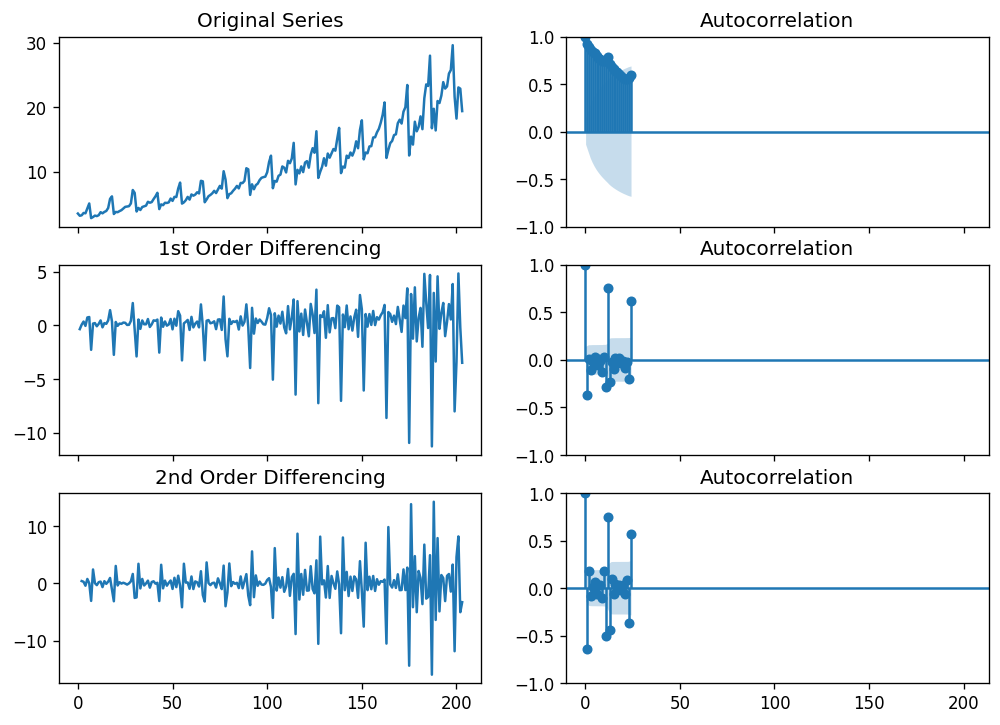

In [5]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

#plt.figure(figsize=(20,9))
plt.rcParams.update({'figure.figsize':(10,7), 'figure.dpi':120})
fig, axes = plt.subplots(3, 2, sharex=True)

# Original series
axes[0, 0].plot(df.value)
axes[0, 0].set_title('Original Series')
plot_acf(df.value, ax=axes[0, 1])

# 1st Differencing
axes[1,0].plot(df.value.diff())
axes[1,0].set_title('1st Order Differencing')
plot_acf(df.value.diff().dropna(), ax=axes[1,1])

# 2nd Differencing
axes[2,0].plot(df.value.diff().diff())
axes[2,0].set_title('2nd Order Differencing')
plot_acf(df.value.diff().diff().dropna(), ax=axes[2,1])

plt.show()

We can see that the time series reaches stationarity with two orders of differencing.

## how to find the order of the AR term (p)

- the next step is to identify if the model needs any AR terms. We will find out the required number of AR terms by inspecting the __Partial Autocorrelation (PACF) plot__.


- __Partial autocorrelation__ can be imagined as the correlation between the series and its lag, after excluding the contributions from the intermediate lags. So, PACF sort of conveys the pure correlation between a lag and the series. This way, we will know if that lag is needed in the AR term or not.


- Partial autocorrelation of lag(k) of a series is the coefficient of that lag in the autoregression equation of Y:
        Y_t = alpha_0 + alpha_1 x Y_t-1 + alpha_2 x Y_t-2 + alpha_3 x Y_t-3
        
        
- that is, suppose, if Y_t is the current series and Y_t-1 is the lag 1 of Y, then the partial correlation of lag 3 (Y_t-3) is the coefficient alpha_3 of Y_t-3 in the above equation.


- now, we should find the number of AR terms. Any correlation in a stationarized series can be rectified by adding enough AR terms. So, we initially take the order of AR term to be equal to as many lags that crosses the significant limit in the PACF plot.

/home/eduardo/.pyenv/versions/3.10.6/envs/inegi/lib/python3.10/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


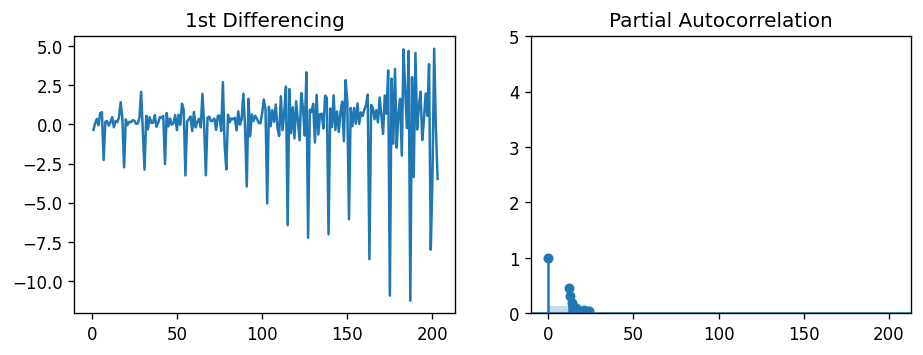

In [6]:
# PACF plot of 1st differenced series
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})

fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].plot(df.value.diff())
axes[0].set_title('1st Differencing')
plot_pacf(df.value.diff().dropna(), ax=axes[1])
axes[1].set(ylim=(0,5))

plt.show()

- We ca see that the PACF lag 1 is quite significant since it is well above the sinificance line. So, we'll fix the value of p to 1.

## how to find the order of the MA term (q)

- the same way we looked at the PACF plot for the number of AR terms, we'll look at the ACF plot for the number of MA terms. An MA term is technically, the error of the lagged forecast.


- the ACF tells how many MA terms are required to remove any autocorrelation in the stationarized series.

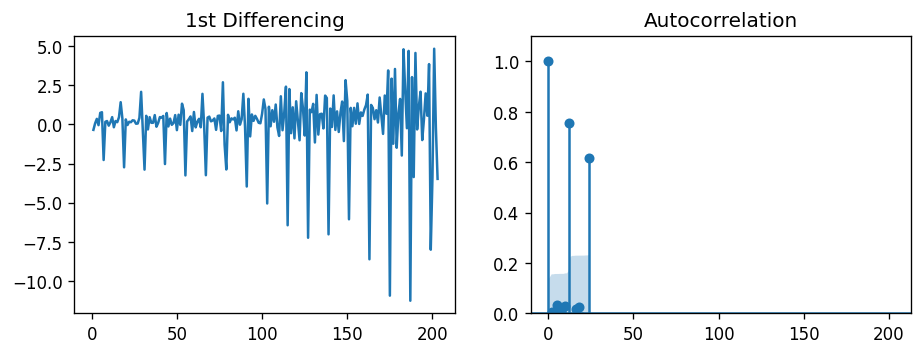

In [7]:
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})

fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].plot(df.value.diff())
axes[0].set_title('1st Differencing')
plot_acf(df.value.diff().dropna(), ax=axes[1])
axes[1].set(ylim=(0,1.1))

plt.show()

We can see that a couple of lags are well above the significance line. So, we'll fix q as 2. If there is any doubt, we will go with the simpler model that sufficiently explains the Y.

## How to handle a time series if it is slightly under or over differenced

-  it may happen that the time series is slightly under differenced. Differencing it one more time makes it slightly over-differenced.


- if the series is slightly under differenced, adding one or more additional AR terms usually makes it up. Likewise, if it is slightly over-differenced, we'll try adding and additional MA term.

## How to build the ARIMA model

In [11]:
from statsmodels.tsa.arima.model import ARIMA

# build ARIMA model with parameters p,d,q = (1,1,2)
model = ARIMA(df.value, order=(1,1,2))

model_fit = model.fit()
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  value   No. Observations:                  204
Model:                 ARIMA(1, 1, 2)   Log Likelihood                -424.570
Date:                Thu, 25 Jan 2024   AIC                            857.140
Time:                        12:29:20   BIC                            870.393
Sample:                             0   HQIC                           862.502
                                - 204                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4178      0.356      1.174      0.240      -0.280       1.115
ma.L1         -0.9546      0.377     -2.531      0.011      -1.694      -0.215
ma.L2          0.0969      0.272      0.356      0.722      -0.437       0.631
sigma2         3.8259      0.269     14.209      0.000       3.298       4.354
===================================================================================
Ljung-Box (L1) (Q):                   0.46   Jarque-Bera (JB):               135.61
Prob(Q):                              0.50   Prob(JB):                         0.00
Heteroskedasticity (H):               9.82   Skew:                            -0.80
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.67
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

- the table in the middle of the model summary shows the coefficients table where the values under 'coef' are the weights of the respective terms.


- the coefficient of the MA2 term is close to zero and the P-Value in 'P>|z|' column is highly insignificant. it should ideally be less than 0.05 for the respective X to be significant.


- So, we'll rebuild the model without the MA2 term.